<a href="https://colab.research.google.com/github/VictorGuui/INPE/blob/master/Atividade4_6INPE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.6 MB/s eta 0:00:00


In [5]:
import cartopy.crs as ccrs

In [6]:
import cartopy.feature as cfeature

In [7]:
pip install geopandas

In [8]:
import geopandas as gpd

In [9]:
import pandas as pd

In [10]:
import matplotlib.colors as mcolors


In [11]:
estados = gpd.read_file("/content/drive/MyDrive/BR_UF_2022.shx")

In [35]:
dset = xr.open_dataset("/content/drive/MyDrive/sst.mnmean.nc")

In [36]:
dset

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [37]:
dset_tropical = dset.sel(lat=slice(30, -30))

In [38]:
dset_tropical

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [50]:
precipitacao = dset_tropical['sst']
# sst é algo similar ao precip pois passa os valores das variaveis time,latitude,longitude

In [51]:
precipitacao = precipitacao.sel(time=slice('1991-01-01', '2020-12-01'))

In [52]:
media_climatologica = precipitacao.groupby('time.month').mean(dim='time')

In [53]:
media_climatologica

<xarray.DataArray 'sst' (month: 12, lat: 60, lon: 360)>
array([[[18.320335, 18.341333, 18.365   , ..., 18.260332, 18.279999,
         18.300333],
        [18.706   , 18.725002, 18.747663, ..., 18.652336, 18.670666,
         18.687998],
        [19.116331, 19.133333, 19.15667 , ..., 19.073668, 19.088335,
         19.103666],
        ...,
        [22.505333, 22.306334, 22.109001, ..., 23.110332, 22.91    ,
         22.711334],
        [22.349997, 22.159668, 21.975334, ..., 22.940996, 22.753334,
         22.55933 ],
        [22.149666, 21.985003, 21.829336, ..., 22.680336, 22.516665,
         22.339668]],

       [[17.612999, 17.620665, 17.628332, ..., 17.596   , 17.601667,
         17.608334],
        [18.045666, 18.05433 , 18.064331, ..., 18.022665, 18.031334,
         18.037333],
        [18.506998, 18.516336, 18.528666, ..., 18.480661, 18.488333,
         18.497997],
...
        [19.322666, 19.15433 , 19.001333, ..., 19.799662, 19.664001,
         19.507336],
        [19.113997, 18.952332, 18.802666, ..., 19.545998, 19.431334,
         19.290335],
        [18.877333, 18.732666, 18.599333, ..., 19.244667, 19.152998,
         19.033665]],

       [[19.486332, 19.551666, 19.618   , ..., 19.292667, 19.35633 ,
         19.421999],
        [19.842335, 19.905   , 19.969667, ..., 19.660004, 19.721334,
         19.781   ],
        [20.231667, 20.288002, 20.352333, ..., 20.060001, 20.117   ,
         20.174335],
        ...,
        [20.894665, 20.707996, 20.528664, ..., 21.464666, 21.282   ,
         21.094002],
        [20.72633 , 20.54833 , 20.378998, ..., 21.280664, 21.11033 ,
         20.930998],
        [20.547665, 20.392336, 20.248999, ..., 21.036333, 20.89267 ,
         20.732996]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 29.5 28.5 27.5 26.5 25.5 ... -26.5 -27.5 -28.5 -29.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/14)
    long_name:                Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:     [-5. 40.]
    actual_range:             [-1.7999996 35.56862  ]
    units:                    degC
    precision:                2
    least_significant_digit:  2
    ...                       ...
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Weekly Mean
    standard_name:            sea_surface_temperature
    cell_methods:             time: mean (monthly from weekly values interpol...
    valid_range:              [-500 4000]

In [55]:
dset_1998 = dset_tropical.sel(time=slice("1998-01-01", "1998-12-31"))
dset_2022 = dset_tropical.sel(time=slice("2022-01-01", "2022-12-31"))

In [54]:
dset_1998

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1998-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 18.77 18.78 18.79 ... 20.99 20.76 20.52
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [41]:
dset_2022

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [56]:
anomalia1998 = dset_1998 - media_climatologica

UFuncTypeError: ignored

In [ ]:
anomalia1998

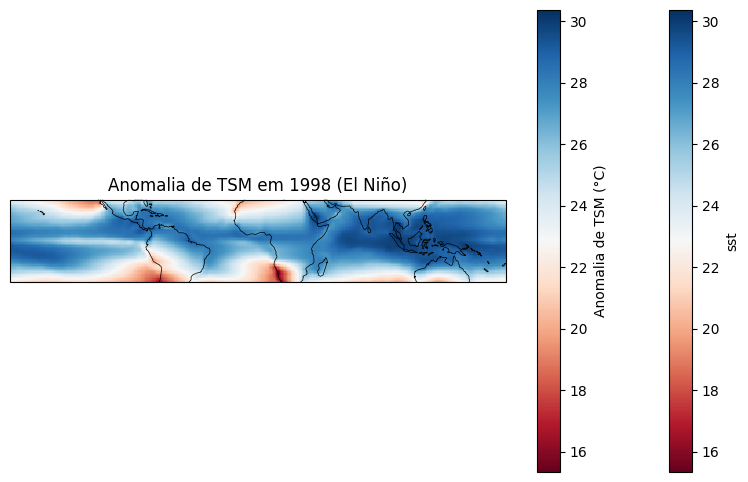

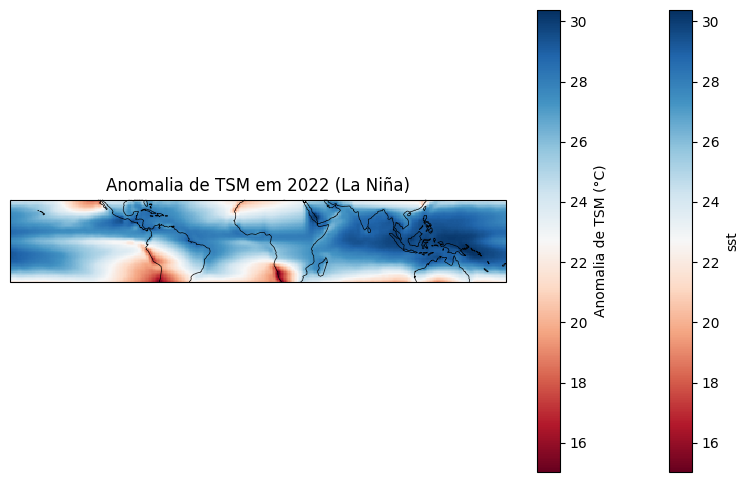

In [48]:
# Função para plotar um mapa
def plot_map(data_array, title):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.5)

    # Média ao longo da dimensão do tempo
    mean_data = data_array.mean(dim='time')

    # Plotar a anomalia média
    mappable = mean_data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu')

    # Adicionar a barra de cores
    plt.colorbar(mappable, label='Anomalia de TSM (°C)')

    plt.title(title)
    plt.show()

# Plotar os mapas para 1998 e 2022
plot_map(dset_1998.sst, 'Anomalia de TSM em 1998 (El Niño)')
plot_map(dset_2022.sst, 'Anomalia de TSM em 2022 (La Niña)')

